In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import math 

# Dados
Analisados 420 frames do vídeo (150 -> 570)

In [50]:
path = './data.txt'

df = pd.read_csv(path, sep=';', header=0)
df.drop(columns='Unnamed: 7', inplace=True)
df

,t,x,vx,ax,frame,px,K
0,"0,000","0,213",NaN,NaN,140.0,NaN,NaN
1,"0,017","0,214","4,539E-2",NaN,141.0,"4,539E-2","1,043E-3"
2,"0,033","0,215","5,799E-2","-0,216",142.0,"5,799E-2","1,710E-3"
3,"0,050","0,215","3,278E-2","-1,167",143.0,"3,278E-2","5,658E-4"
4,"0,067","0,216","1,765E-2","-0,735",144.0,"1,765E-2","1,558E-4"
...,...,...,...,...,...,...,...
426,"7,104","0,155","0,000","0,000",566.0,"0,000","0,000"
427,"7,121","0,155","0,000","0,000",567.0,"0,000","0,000"
428,"7,137","0,155","0,000","0,000",568.0,"0,000","0,000"
429,"7,154","0,155","0,000",NaN,569.0,"0,000","0,000"


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   t       431 non-null    object 
 1   x       430 non-null    object 
 2   vx      426 non-null    object 
 3   ax      422 non-null    object 
 4   frame   430 non-null    float64
 5   px      426 non-null    object 
 6   K       426 non-null    object 
dtypes: float64(1), object(6)
memory usage: 23.7+ KB


Retirar valores N/A

In [52]:
df.dropna(inplace=True)

In [53]:
df.shape

(422, 7)

Conversão objects -> int

In [54]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].str.replace(',', '.').astype(float)

# Gráficos
Posição(x), Velocidaed(x) e Aceleração(x) em função do tempo(s)

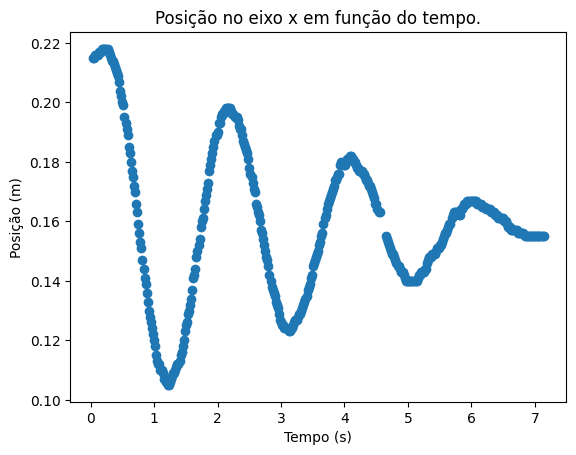

In [55]:
plt.scatter(df['t'], df['x'])
plt.xlabel('Tempo (s)')
plt.ylabel('Posição (m)')
plt.title('Posição no eixo x em função do tempo.')
plt.show()

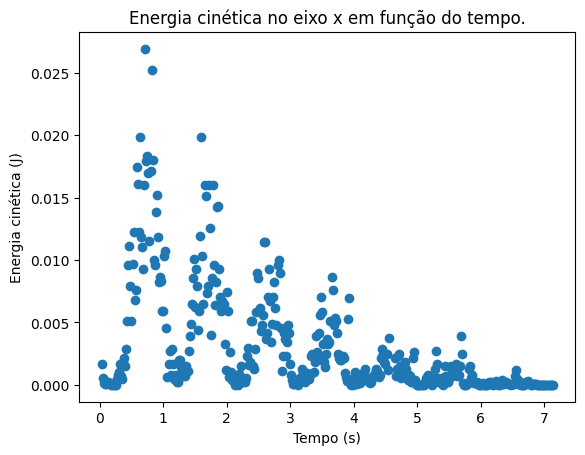

In [56]:
plt.scatter(df['t'], df['K'])
plt.xlabel('Tempo (s)')
plt.ylabel('Energia cinética (J)')
plt.title('Energia cinética no eixo x em função do tempo.')
plt.show()

## 

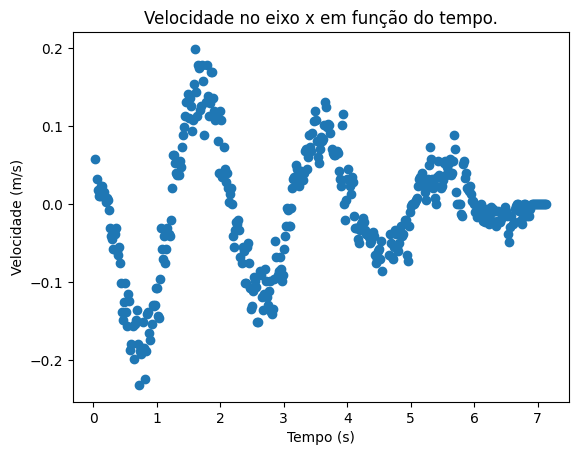

In [57]:
plt.scatter(df['t'], df['vx'])
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (m/s)')
plt.title('Velocidade no eixo x em função do tempo.')
plt.show()

plt.scatter(df['t'], df['ax'])
plt.xlabel('Tempo (s)')
plt.ylabel('Aceleração (m/s^2)')
plt.title('Aceleração no eixo x em função do tempo.')
plt.show()

## Cálculo constante elástica

7.137 segundos significa o tempo total do video analisado, ou seja, tempo total para o objeto parar.

In [58]:
df['t'][-1:]

428    7.137
Name: t, dtype: float64

* Período é de 7.137 segundos
* Fórmula: Período[7,137]/Oscilações[3] (Objeto só oscilou 3x) 

In [59]:
periodo = 7.137/3
print(f'período = {periodo}')

período = 2.379


Como não sabemos a massa do carrinho, colocar 0.100 gramas q é algo convincente

In [60]:
m = 0.100 
k = ((4*math.pi)*(m))/(periodo**2)

In [61]:
print(f'Constante elástica: {round(k,6)} N/m')

Constante elástica: 0.222035 N/m


In [62]:
# Em outros cálculos, a constante elástica chegou a 0.66 (VERIFICAR E SUSBSTITUIR NO CÓDIGO)
K = 0.66

## Gráficos: EPE e EMT
(Energia Potencial Elástica e Enetergia Mecânica Total)

### Cálculos

* Cálculo da Energia Potenccial Elástica utilizando o valor de 0.22N/m (k)

In [63]:
df['potencial_elastica'] =  ((k)*(df['x']**2))/2
df.head()

,t,x,vx,ax,frame,px,K,potencial_elastica
2,0.033,0.215,0.05799,-0.216,142.0,0.05799,0.001710,0.005132
3,0.050,0.215,0.03278,-1.167,143.0,0.03278,0.000566,0.005132
4,0.067,0.216,0.01765,-0.735,144.0,0.01765,0.000156,0.005180
5,0.083,0.216,0.01009,-0.173,145.0,0.01009,0.000051,0.005180
6,0.100,0.216,0.01009,0.346,146.0,0.01009,0.000054,0.005180


* Cálculo da Energia Mecânica Total (Cinética + Elástica)

In [64]:
df['energia_mec_total'] = df['K'] + df['potencial_elastica']
df.head()

,t,x,vx,ax,frame,px,K,potencial_elastica,energia_mec_total
2,0.033,0.215,0.05799,-0.216,142.0,0.05799,0.001710,0.005132,0.006842
3,0.050,0.215,0.03278,-1.167,143.0,0.03278,0.000566,0.005132,0.005698
4,0.067,0.216,0.01765,-0.735,144.0,0.01765,0.000156,0.005180,0.005335
5,0.083,0.216,0.01009,-0.173,145.0,0.01009,0.000051,0.005180,0.005230
6,0.100,0.216,0.01009,0.346,146.0,0.01009,0.000054,0.005180,0.005234


### Gráficos

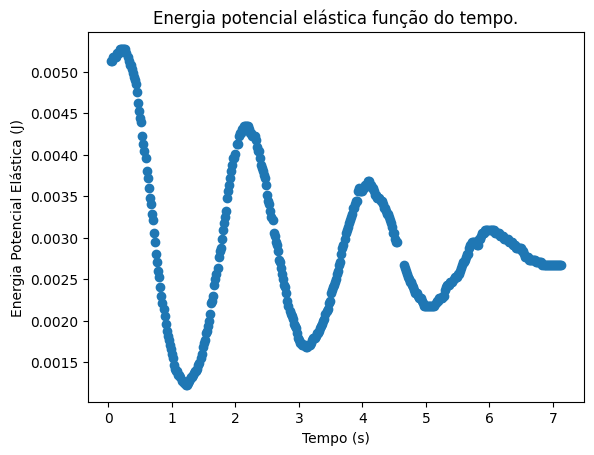

In [65]:
plt.scatter(df['t'], df['potencial_elastica'])
plt.xlabel('Tempo (s)')
plt.ylabel('Energia Potencial Elástica (J)')
plt.title('Energia potencial elástica função do tempo.')
plt.show()

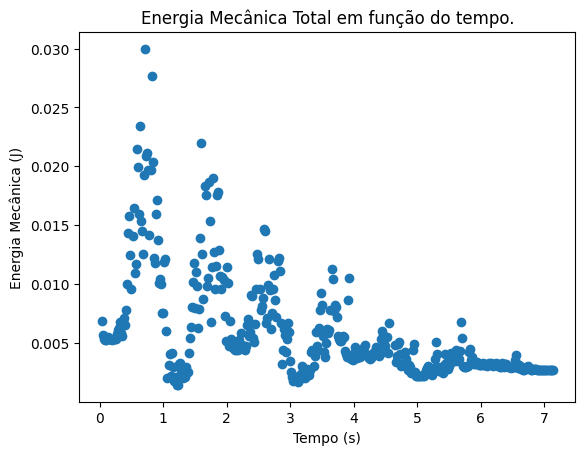

In [66]:
plt.scatter(df['t'], df['energia_mec_total'])
plt.xlabel('Tempo (s)')
plt.ylabel('Energia Mecânica (J)')
plt.title('Energia Mecânica Total em função do tempo.')
plt.show()